<a href="https://colab.research.google.com/github/easyforitall/Ticket-price-prediction-using-ML-/blob/main/Ticket_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA SCIENCE AND ITS APPLICATIONS:
-> Data science is all about analysis and predictions
steps :
1) problem statement
2)Data collecting
3)Data preprocessing(removing unwanted data from the data
4)EDA
Applications :
1) Uber /Ola
2) Google Map
3) Amazon is recommend their product to the user
4) Netflix 
5) Instagram
LIFE CYCLE OF A DATASCIENCE/ML PROJECT :
1) what exactly my use case is 
2) Business understanding (Gather to collect the data required for the use case)business Analyst and domain expertise 
3) Data Finding (Data Analyst/Data scientist )
4) Big Data Engineer(Transorm the rawdata) ->Data Scientist ->To check whether it is in right format or not
5) Data Cleaning/Data Wrangling
6) Feature Engineering( Examine each and very feature and encode it line feature encoding,converting categorical data inot numerical Data, feature selection(covariance,correlation)
7) ML algorithms (which deals with mathematics) depending on the use case(Regression,classification,clustering and Timeseries Analysis)
8) Hypertune( I have to find the optimize the value of these hyper parameters of these hyper parameters of this usecase algortithm)-> To achieve best model
9) MachineLearning Engineer -> deploy your ML model scalable.

PROJECT 1 -- PREDICT FARE OF AIRLINES TICKETS USING MACHINE LEARNING

In [ ]:
# INTRODUCTION TO BUSINESS PROBLEM AND DATASET
# DATASETS AND RESOURCES
# READING THE DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import os
os.chdir("C://Users//43720//Downloads")

In [ ]:
train_data = pd.read_excel("Data_Train.xlsx")
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
train_data.shape

(10683, 11)

In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

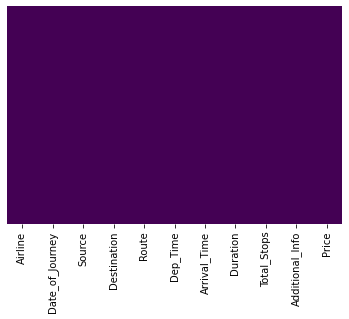

In [ ]:
#visually we can see
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [ ]:
train_data["Total_Stops"].isnull().sum()

1

In [ ]:
train_data[train_data["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [ ]:
# it is having both missing values in this row so we can drop that
train_data.drop(index=9039,axis=0,inplace=True)
# or we can use train_data.dropna(inplace=True)

In [ ]:
#PERFROM DATA-PREPROCESSING AND EXTRACT DERIVED FEATURES
#Featurization of DATE_OF_JOURNEY,Arrival_Time, Dep_Time
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [ ]:
for features in ["Date_of_Journey","Dep_Time","Arrival_Time"]:
    change_into_datetime(features)

In [ ]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [ ]:
train_data["Month"] = train_data["Date_of_Journey"].dt.month

In [ ]:
train_data["Day"] = train_data["Date_of_Journey"].dt.day

In [ ]:
train_data["Year"] = train_data["Date_of_Journey"].dt.year

In [ ]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-06-20 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-06-20 05:50:00,2022-06-20 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-20 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-06-20 18:05:00,2022-06-20 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-06-20 16:50:00,2022-06-20 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2022-06-20 19:55:00,2022-06-20 22:25:00,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2022-06-20 20:45:00,2022-06-20 23:20:00,2h 35m,non-stop,No info,4145,4,27,2019
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2022-06-20 08:20:00,2022-06-20 11:20:00,3h,non-stop,No info,7229,4,27,2019
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2022-06-20 11:30:00,2022-06-20 14:10:00,2h 40m,non-stop,No info,12648,1,3,2019


In [ ]:
train_data.rename(columns={'Day':'Journey_Day',"Month":"Journey_Month","Year":"Journey_Year"},inplace=True)

In [ ]:
train = train_data.copy()

In [ ]:
train.drop(columns = ["Journey_Day","Journey_Month","Journey_Year"],inplace=True)

In [ ]:
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-06-20 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-06-20 05:50:00,2022-06-20 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-20 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-06-20 18:05:00,2022-06-20 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-06-20 16:50:00,2022-06-20 21:35:00,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2022-06-20 19:55:00,2022-06-20 22:25:00,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2022-06-20 20:45:00,2022-06-20 23:20:00,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2022-06-20 08:20:00,2022-06-20 11:20:00,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2022-06-20 11:30:00,2022-06-20 14:10:00,2h 40m,non-stop,No info,12648


In [ ]:
#PERFORM DATA CLEANING AND FEATURIZATION
train_data.drop("Date_of_Journey",axis=1,inplace=True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-06-20 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-06-20 05:50:00,2022-06-20 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-20 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-06-20 18:05:00,2022-06-20 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-06-20 16:50:00,2022-06-20 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019


In [ ]:
#feature extracting of departure time
def extract_hour_min(df,col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_min"] = df[col].dt.minute
    return df.head(2)

In [ ]:
extract_hour_min(train_data,"Dep_Time")

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Journey_Year,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-06-20 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-06-20 05:50:00,2022-06-20 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50


In [ ]:
extract_hour_min(train_data,"Arrival_Time")

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Journey_Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-06-20 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-06-20 05:50:00,2022-06-20 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [ ]:
train_data.dtypes

Airline                      object
Source                       object
Destination                  object
Route                        object
Dep_Time             datetime64[ns]
Arrival_Time         datetime64[ns]
Duration                     object
Total_Stops                  object
Additional_Info              object
Price                         int64
Journey_Month                 int64
Journey_Day                   int64
Journey_Year                  int64
Dep_Time_hour                 int64
Dep_Time_min                  int64
Arrival_Time_hour             int64
Arrival_Time_min              int64
dtype: object

In [ ]:
train_data.drop(["Dep_Time","Arrival_Time"],axis=1,inplace=True)

In [ ]:
# PERFORMING DATA ANALYSIS
# Analyse when will most of the flights will take-off
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Journey_Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [ ]:
def flight_dep_time(x):
    if(x>4) and (x<=8):
        return "Early mrng"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"

In [ ]:
train_data["Dep_Time_hour"].apply(flight_dep_time).value_counts()

Early mrng    2880
Evening       2357
Morning       2209
Noon          1731
Night         1040
Late Night     465
Name: Dep_Time_hour, dtype: int64

<AxesSubplot:>

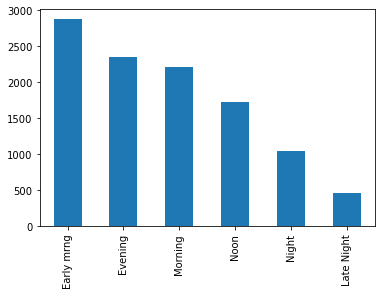

In [ ]:
train_data["Dep_Time_hour"].apply(flight_dep_time).value_counts().plot(kind="bar")

In [ ]:
# To make this attractive
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [ ]:
cf.go_offline()

In [ ]:
train_data["Dep_Time_hour"].apply(flight_dep_time).value_counts().iplot(kind="bar")

In [ ]:
# perform preprocessing on Duration Feature
def preprocess_duration(x):
    if 'h' not in x:
        x ='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x

In [ ]:
train_data["Duration"] = train_data["Duration"].apply(preprocess_duration)

In [ ]:
train_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Journey_Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,4,27,2019,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,4,27,2019,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10


In [ ]:
train_data["Duration_hours"] = train_data["Duration"].apply(lambda x:x.split(" ")[0][0:-1])

In [ ]:
train_data["Duration_min"] = train_data["Duration"].apply(lambda x:x.split(" ")[1][0:-1])

In [ ]:
train_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Journey_Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,4,27,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,4,27,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10,2,40


In [ ]:
#Analyse whether Duration Affects price or not
# which city has maximum final destinations of flights
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
train_data["Duration_total_hours"]=train_data["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)

WE CAN ANALYSE USING SCATTERPLOT BECAUSE BOTH ARE NUMERICALS ALSO LM PLOT BECOZ(LM:REGRESSIONPLOT+SCATTERPLOT)

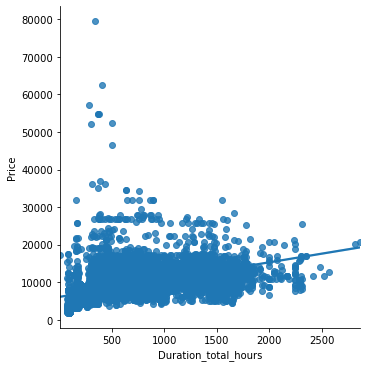

In [ ]:
sns.lmplot(x="Duration_total_hours",y="Price",data=train_data)

<AxesSubplot:>

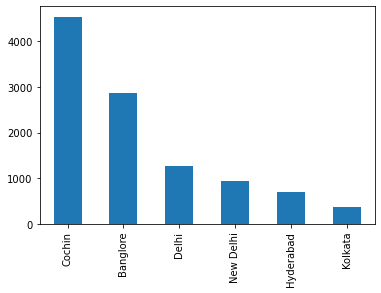

In [ ]:
train_data["Destination"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='Destination'>

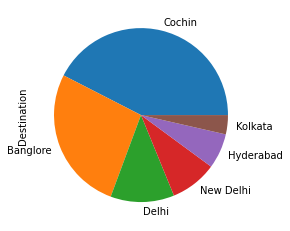

In [ ]:
train_data["Destination"].value_counts().plot(kind="pie")

<AxesSubplot:>

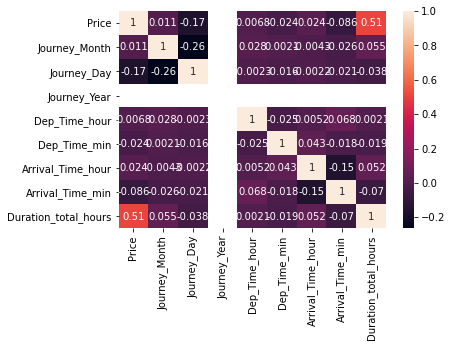

In [ ]:
sns.heatmap(train_data.corr(),annot=True)

In [ ]:
#PERFORMING BI-VARIATE ANALYSIS
#On which route JET AIRWAYS IS EXTREMELY USED
train_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Journey_Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_min,Duration_total_hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25,2,30,150
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,4,27,2019,20,45,23,20,2,35,155
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,4,27,2019,8,20,11,20,3,0,180
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10,2,40,160


In [ ]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [ ]:
#On which route JET AIRWAYS IS EXTREMELY USED
train_data[train_data["Airline"]=="Jet Airways"].groupby("Route").size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
DEL → JAI → BOM → COK    207
BOM → HYD                207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
BOM → BDQ → DEL → HYD      2
DEL → DED → BOM → COK      2
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
BOM → DED → DEL → HYD      1
DEL → CCU → BOM → COK      1
dtype: int64

In [ ]:
# perform AIRLINE vs PriceAnalysis
# seaborn box plot(5point summary of the data) says 
Q3-75th percentile range below the max range
Q1 = 25th percentile range above the min value
Max = Q3 + 1.5(IQR) -> InterQuartileRange(Q3-Q1)
Min = Q1 - 1.5(IQR)
#ABove Max values are called outliers

SyntaxError: invalid syntax (<ipython-input-106-b7e8a768c953>, line 3)

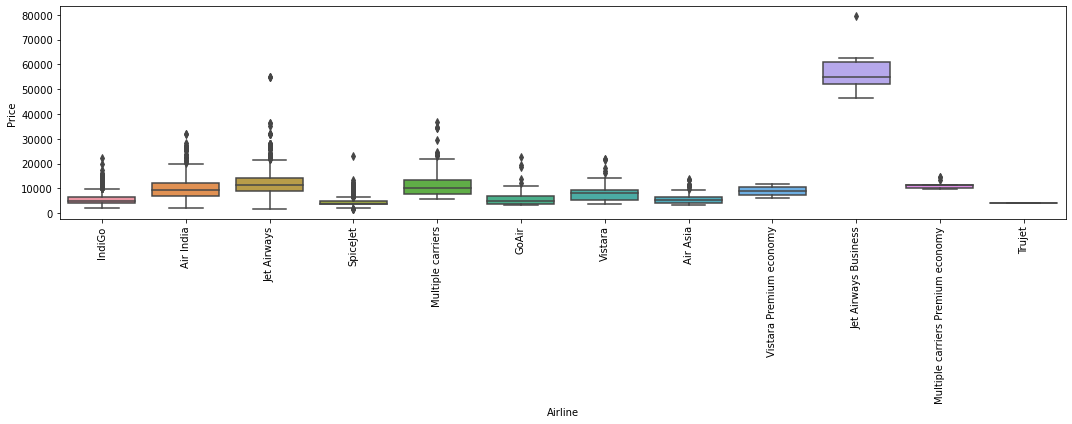

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(y="Price",x="Airline",data=train_data)
plt.xticks(rotation="vertical")
plt.tight_layout()

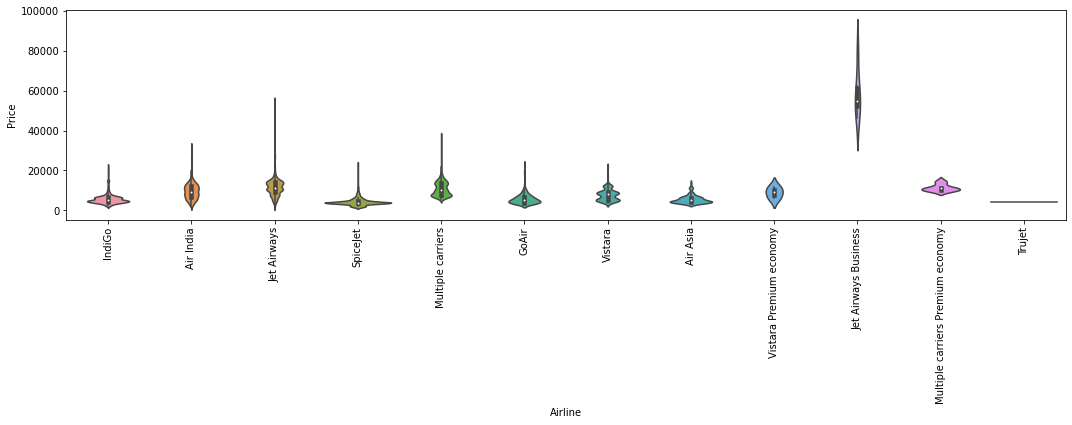

In [ ]:
#violinplot(we will get both distributionplot and boxplot)
plt.figure(figsize=(15,6))
sns.violinplot(y="Price",x="Airline",data=train_data)
plt.xticks(rotation="vertical")
plt.tight_layout()

In [ ]:
#APPLYING ONE-HOT ENCODING ON DATA(FEATURE ENCODING)
train_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Journey_Year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_min,Duration_total_hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25,2,30,150
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,4,27,2019,20,45,23,20,2,35,155
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,4,27,2019,8,20,11,20,3,0,180
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10,2,40,160


In [ ]:
train_data["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [ ]:
# To know in percentage
train_data["Additional_Info"].value_counts()/len(train_data)*100

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
2 Long layover                   0.009362
1 Short layover                  0.009362
Red-eye flight                   0.009362
Name: Additional_Info, dtype: float64

In [ ]:
np.round(train_data["Additional_Info"].value_counts()/len(train_data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
2 Long layover                   0.01
1 Short layover                  0.01
Red-eye flight                   0.01
Name: Additional_Info, dtype: float64

In [ ]:
#78.11 is on noinfo so this data was not used so..
train_data.drop(columns=["Additional_Info","Route","Duration_total_hours","Journey_Year"],axis=1,inplace=True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35,4,45


In [ ]:
train_data.dtypes

Airline              object
Source               object
Destination          object
Duration             object
Total_Stops          object
Price                 int64
Journey_Month         int64
Journey_Day           int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
Duration_hours       object
Duration_min         object
dtype: object

In [ ]:
train_data["Duration_hours"] = train_data["Duration_hours"].astype("int")

In [ ]:
train_data["Duration_min"] = train_data["Duration_min"].astype("int")

In [ ]:
train_data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
# Ordinal Data -> LabelEncoding
#Nominal Data -> Onehotencoding

In [ ]:
source = pd.get_dummies(train_data["Source"],prefix="Source_")
source
# we can concate it
#train_data = pd.concat([train_data,sources],axis=1)

,Source__Banglore,Source__Chennai,Source__Delhi,Source__Kolkata,Source__Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
10678,0,0,0,1,0
10679,0,0,0,1,0
10680,1,0,0,0,0
10681,1,0,0,0,0


In [ ]:
# The Another method
for i in train_data["Source"]:
    train_data["Source_"+i] = train_data["Source"].apply(lambda x : 1 if x==i else 0)

In [ ]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35,4,45,1,0,0,0,0


In [ ]:
#Applying TARGET GUIDED ENCODING ON DATA
#Perform Manual Encoding on Data
airlines = train_data.groupby("Airline")["Price"].mean().sort_values().index
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [ ]:
dict1 = {key:index for index,key in enumerate(airlines,0)}
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [ ]:
train_data["Airline"] = train_data["Airline"].map(dict1)

In [ ]:
train_data["Destination"].replace('New Delhi','Delhi',inplace=True)

In [ ]:
train_data["Destination"].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [ ]:
dest = train_data.groupby("Destination")["Price"].mean().sort_values().index
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [ ]:
dict2 = {key:index for index,key in enumerate(dest,0)}
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [ ]:
train_data["Destination"] = train_data["Destination"].map(dict2)

In [ ]:
train_data

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2 stops,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,2,4h 45m,1 stop,13302,1,3,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,Kolkata,3,2h 30m,non-stop,4107,9,4,19,55,22,25,2,30,0,1,0,0,0
10679,7,Kolkata,3,2h 35m,non-stop,4145,4,27,20,45,23,20,2,35,0,1,0,0,0
10680,10,Banglore,2,3h 0m,non-stop,7229,4,27,8,20,11,20,3,0,1,0,0,0,0
10681,5,Banglore,2,2h 40m,non-stop,12648,1,3,11,30,14,10,2,40,1,0,0,0,0


In [ ]:
#performing manual encoding on Total_stops
stop = train_data.groupby("Total_Stops")["Price"].mean().sort_values().index
stop

Index(['non-stop', '1 stop', '2 stops', '3 stops', '4 stops'], dtype='object', name='Total_Stops')

In [ ]:
dict3 = {key:index for index,key in enumerate(stop,0)}
dict3

{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}

In [ ]:
#train_data["Total_Stops"].map(dict3) we can use or else we can do manually
train_data["Total_Stops"] = train_data["Total_Stops"].apply(lambda x:dict3[x])

In [ ]:
train_data

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,2,4h 45m,1,13302,1,3,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,Kolkata,3,2h 30m,0,4107,9,4,19,55,22,25,2,30,0,1,0,0,0
10679,7,Kolkata,3,2h 35m,0,4145,4,27,20,45,23,20,2,35,0,1,0,0,0
10680,10,Banglore,2,3h 0m,0,7229,4,27,8,20,11,20,3,0,1,0,0,0,0
10681,5,Banglore,2,2h 40m,0,12648,1,3,11,30,14,10,2,40,1,0,0,0,0


HOW TO HANDLE OUTLIERS OF THE DATA

In [ ]:
# Lets perform outlier detection
# How to deal with outlier...
#distribution,histogram,Boxplot

In [ ]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



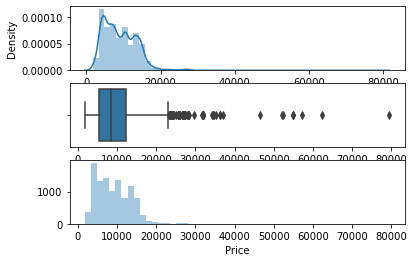

In [ ]:
plot(train_data,'Price')

In [ ]:
train_data["Price"]=np.where(train_data['Price']>=35000,train_data["Price"].median(),train_data['Price'])

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



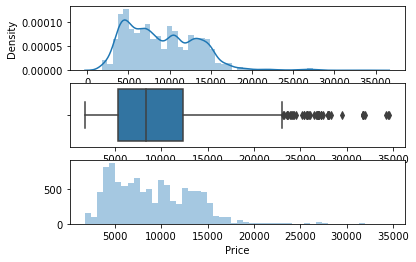

In [ ]:
plot(train_data,"Price")

In [ ]:
#Selecting best features using feature selection1
train_data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0


In [ ]:
train_data.drop(columns=["Source",'Duration'],axis=1,inplace=True)

In [ ]:
train_data.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
Price                float64
Journey_Month          int64
Journey_Day            int64
Dep_Time_hour          int64
Dep_Time_min           int64
Arrival_Time_hour      int64
Arrival_Time_min       int64
Duration_hours         int32
Duration_min           int32
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
X = train_data.drop(['Price'],axis=1)

In [ ]:
y = train_data["Price"]

In [ ]:
X.dtypes

Airline              int64
Destination          int64
Total_Stops          int64
Journey_Month        int64
Journey_Day          int64
Dep_Time_hour        int64
Dep_Time_min         int64
Arrival_Time_hour    int64
Arrival_Time_min     int64
Duration_hours       int32
Duration_min         int32
Source_Banglore      int64
Source_Kolkata       int64
Source_Delhi         int64
Source_Chennai       int64
Source_Mumbai        int64
dtype: object

In [ ]:
y.dtypes

dtype('float64')

In [ ]:
mutual_info_regression(X,y)

array([0.96766068, 1.0054557 , 0.78458959, 0.23789825, 0.19076284,
       0.32969637, 0.25415015, 0.41256069, 0.34648663, 0.46422021,
       0.34259949, 0.39614127, 0.46616982, 0.52319654, 0.13712391,
       0.20221007])

In [ ]:
#mutual_info_regression typically measures the dependency between two variables
imp = pd.DataFrame(mutual_info_regression(X,y),index = X.columns)
imp.columns = ["importance"]

In [ ]:
imp.sort_values(by='importance',ascending=False)

,importance
Destination,1.001986
Airline,0.985710
Total_Stops,0.786169
Source_Delhi,0.525053
Duration_hours,0.468656
Source_Kolkata,0.456240
Arrival_Time_hour,0.401885
Source_Banglore,0.390249
Arrival_Time_min,0.351453
Duration_min,0.347402


In [ ]:
#Machine Learning
#Intituon behind the Random Forest(used both in classification and regression)

#Random forest follows ensemble learning approach (collection of multiple decision trees)
# Decision tree is a base algorithm for random forest 
# Decision tree follows based on the condition
#entropy and information gain were used to get the desicion trees and also the gini index als
#entropy formuale -> -pi*log2(pi) -> i is the number of classes in that particular feature
# Information gain -> 1-summation(Sn/s*Ei) s-> total datapoints in that particular feature sn-> total data points respective 
#to particular one and Eu -> Entropy of particular datapoint in a particular feature
# Gini index -> 1-summation(c to u=1)(pi)^2 -> Value with low gini index is considered as parent node

In [ ]:
#Random forest will convert the high variance difference into low variance difference by using the decision tree algorithm

In [ ]:
# Applying Machine Learning Algorithm on data
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#To build ML model
# To save the model
from sklearn.ensemble import RandomForestRegressor

In [ ]:
ml_model = RandomForestRegressor()

In [ ]:
model = ml_model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_test

6075    16655.0
3544     4959.0
9291     9187.0
5032     3858.0
2483    12898.0
         ...   
6148    14714.0
4680    17234.0
4337     8434.0
7289     9709.0
8641    13587.0
Name: Price, Length: 3526, dtype: float64

In [ ]:
y_pred

array([16756.91  ,  6663.15  ,  8884.56  , ...,  8830.3   ,  8905.78  ,
       11733.8975])

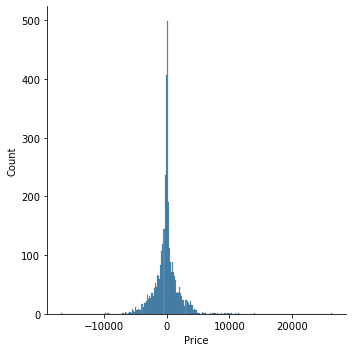

In [ ]:
sns.displot(y_test-y_pred)

In [ ]:
# Saving the model
!pip install pickle

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [ ]:
import pickle

In [ ]:
file = open('C://Users//43720//OneDrive - ITC INFOTECH INDIA LIMITED//Desktop//pandas//rf_random.pkl','wb')

In [ ]:
pickle.dump(model,file)

In [ ]:
remodel = open('C://Users//43720//OneDrive - ITC INFOTECH INDIA LIMITED//Desktop//pandas//rf_random.pkl','rb')

In [ ]:
forest = pickle.load(remodel)

In [ ]:
forest.predict(X_test)

In [ ]:
# No nooed to do scaling and normalization in decision trees
#Linear Regression(y = m*x + c)
#Machine Learning pipeline
# -> how to define your evaluation metric
#-> How to automate ml pipeline

In [ ]:
#MAPE - MEAN ABSOLUTE PERCENTAGE ERROR
def mape(y_true,y_pred):
    y_true,y_pred = np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [ ]:
mape(y_test,y_pred)

13.3566170852336

In [ ]:
#Automate ML pipeline
def predict(ml_lodel):
    model = ml_model.fit(X_train,y_train)
    print("Training_score: {}".format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    print("Predictions are :{}".format(y_prediction))
    print("\n")
    
    from sklearn import metrics
    r2_score = metrics.r2_score(y_test,y_prediction)
    print("r2_score:{}".format(r2_score))
    print("MSE: {}".format(metrics.mean_squared_error(y_test,y_prediction)))
    print("MAE: {}".format(metrics.mean_absolute_error(y_test,y_prediction)))
    print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test,y_prediction))))
    print("MAPE: {}".format(mape(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)

Training_score: 0.9532337590030839
Predictions are :[16716.45        6397.77        8987.94       ...  8954.95
  8965.23       11794.60916667]


r2_score:0.8085960368819844
MSE: 3675668.165067319
MAE: 1192.3509868917479
RMSE: 1917.203214337833
MAPE: 13.41502100612292


C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



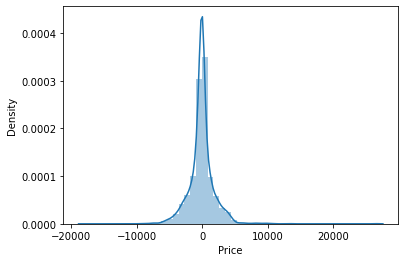

In [ ]:
predict(RandomForestRegressor())

In [ ]:
# How to hypretune a Model or hyperparameter(Randomized search cv(fast), Grid Search cv(slow using permutation & combination))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
reg_rf = RandomForestRegressor()

In [ ]:
np.linspace(start=1000,stop=1200,num=6)

array([1000., 1040., 1080., 1120., 1160., 1200.])

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=1300,stop=1500,num=6)]
max_features = ["auto","sqrt"]
max_depth = [int(x) for x in np.linspace(start=7,stop=30,num=4)]
min_samples_split = [5,10,15,100]

In [ ]:
random_grid = {
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth" : max_depth,
    "min_samples_split" : min_samples_split
}

In [ ]:
rf_random = RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\43720\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [7, 14, 22, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1300, 1340, 1380, 1420,
                                                         1460, 1500]},
                   verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 1460,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 30}

In [ ]:
pred2 = rf_random.predict(X_test)

In [ ]:
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.8310797453545596

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Price', ylabel='Density'>

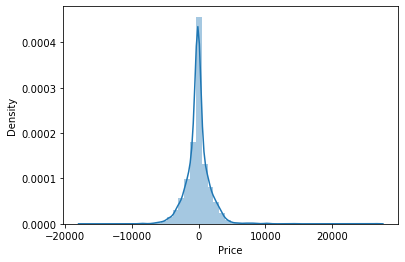

In [ ]:
sns.distplot(y_test-pred2)

In [ ]:
train_data.shape

(10682, 17)

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
mlmodel = SGDRegressor()

In [ ]:
model = mlmodel.fit(X_train,y_train)

In [ ]:
predi = model.predict(X_test)

In [ ]:
predi

array([ 9059.45867458,  6604.9630671 , 10806.1759339 , ...,
        1611.93407913,  5627.98061559,  3233.30532576])

In [ ]:
y_test

6075    16655.0
3544     4959.0
9291     9187.0
5032     3858.0
2483    12898.0
         ...   
6148    14714.0
4680    17234.0
4337     8434.0
7289     9709.0
8641    13587.0
Name: Price, Length: 3526, dtype: float64

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Price', ylabel='Density'>

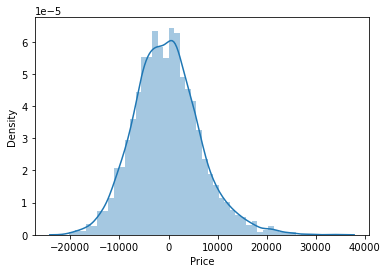

In [ ]:
sns.distplot(y_test-predi)

In [ ]:
mape(y_test,predi)

79.32975562721349

In [ ]:
def predict(ml_lodel):
    model = ml_model.fit(X_train,y_train)
    print("Training_score: {}".format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    print("Predictions are :{}".format(y_prediction))
    print("\n")
    
    from sklearn import metrics
    r2_score = metrics.r2_score(y_test,y_prediction)
    print("r2_score:{}".format(r2_score))
    print("MSE: {}".format(metrics.mean_squared_error(y_test,y_prediction)))
    print("MAE: {}".format(metrics.mean_absolute_error(y_test,y_prediction)))
    print("RMSE: {}".format(np.sqrt(metrics.mean_squared_error(y_test,y_prediction))))
    print("MAPE: {}".format(mape(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)

Training_score: 0.9540675886375337
Predictions are :[16716.45        6267.36        8869.3        ...  9772.23
  8933.67       11760.50833333]


r2_score:0.8099230431704179
MSE: 3650184.707516173
MAE: 1192.0625506284382
RMSE: 1910.545657009058
MAPE: 13.441145018515948


C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



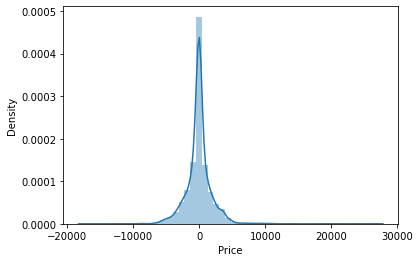

In [ ]:
predict(SGDRegressor())

In [ ]:
!pip show pandas

Name: pandas
Version: 1.1.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: c:\program files\anaconda3\lib\site-packages
Requires: pytz, python-dateutil, numpy
Required-by: pandas-summary, datatile, cufflinks, statsmodels, seaborn


In [ ]:
print(pd.__version__)

1.1.3


In [ ]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : db08276bc116c438d3fdee492026f8223584c477
python           : 3.8.5.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19041
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_United States.1252

pandas           : 1.1.3
numpy            : 1.19.2
pytz             : 2020.1
dateutil         : 2.8.1
pip              : 20.2.4
setuptools       : 50.3.1.post20201107
Cython           : 0.29.21
pytest           : 6.1.1
hypothesis       : None
sphinx           : 3.2.1
blosc            : None
feather          : None
xlsxwriter       : 1.3.7
lxml.etree       : 4.6.1
html5lib         : 1.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.2
IPython          : 7.19.0
pandas_datareader: None
bs4              : 4.9.3
bottleneck 

In [ ]:
print(pd.show_versions())


INSTALLED VERSIONS
------------------
commit           : db08276bc116c438d3fdee492026f8223584c477
python           : 3.8.5.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19041
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_United States.1252

pandas           : 1.1.3
numpy            : 1.19.2
pytz             : 2020.1
dateutil         : 2.8.1
pip              : 20.2.4
setuptools       : 50.3.1.post20201107
Cython           : 0.29.21
pytest           : 6.1.1
hypothesis       : None
sphinx           : 3.2.1
blosc            : None
feather          : None
xlsxwriter       : 1.3.7
lxml.etree       : 4.6.1
html5lib         : 1.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.2
IPython          : 7.19.0
pandas_datareader: None
bs4              : 4.9.3
bottleneck 